#Primer Examen Parcial.
##Matematicas Avanzadas para la Ciecia de Datos.
8 de Noviembre del 2022.

Datos del alumno

Garcia de Arcos Jose Angel Eduardo

Licenciatura en Ciencias de Datos

5AM1

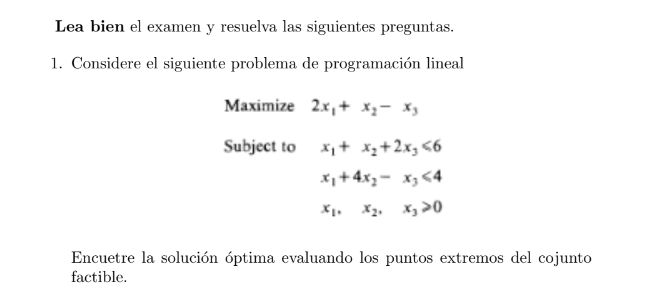

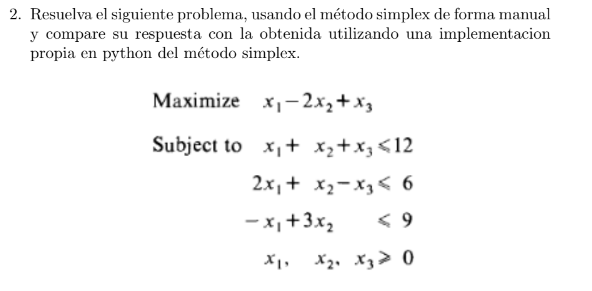

Existe una iteracion infinita por lo cual consideramos que no existe una region factible y valida para la misma

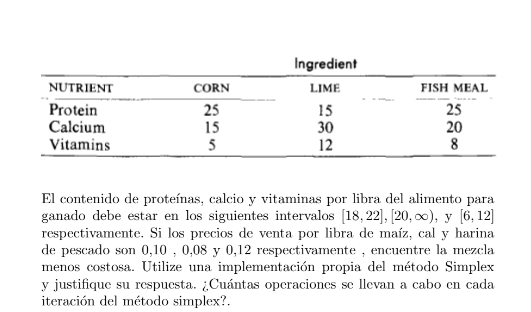

El resultado de l pregunta 4 es un total de 4 iteraciones con las respuestas para x1, x2, x3 como

X1 = 0

X2 = 18

X3 = 20

Para determinar el valor de z 

In [18]:
from __future__ import division
from numpy import *
class Tableau:
    def __init__(self, obj):
        self.obj = [1] + obj
        self.rows = []
        self.cons = []
    def add_constraint(self, expression, value):
        self.rows.append([0] + expression)
        self.cons.append(value)
    def _pivot_column(self):
        low = 0
        idx = 0
        for i in range(1, len(self.obj)-1):
            if self.obj[i] < low:
                low = self.obj[i]
                idx = i
        if idx == 0: return -1
        return idx
    def _pivot_row(self, col):
        rhs = [self.rows[i][-1] for i in range(len(self.rows))]
        lhs = [self.rows[i][col] for i in range(len(self.rows))]
        ratio = []
        for i in range(len(rhs)):
            if lhs[i] == 0:
                ratio.append(99999999 * abs(max(rhs)))
                continue
            ratio.append(rhs[i]/lhs[i])
        return argmin(ratio)
    def display(self):
        print('\n', matrix([self.obj] + self.rows))
    def _pivot(self, row, col):
        e = self.rows[row][col]
        self.rows[row] /= e
        for r in range(len(self.rows)):
            if r == row: continue
            self.rows[r] = self.rows[r] - self.rows[r][col]*self.rows[row]
        self.obj = self.obj - self.obj[col]*self.rows[row]
    def _check(self):
        if min(self.obj[1:-1]) >= 0: return 1
        return 0
        
    def solve(self):
        # build full tableau
        for i in range(len(self.rows)):
            self.obj += [0]
            ident = [0 for r in range(len(self.rows))]
            ident[i] = 1
            self.rows[i] += ident + [self.cons[i]]
            self.rows[i] = array(self.rows[i], dtype=float)
        self.obj = array(self.obj + [0], dtype=float)
        # solve
        self.display()
        while not self._check():
            c = self._pivot_column()
            r = self._pivot_row(c)
            self._pivot(r,c)
            print ('\npivot column: %s\npivot row: %s'%(c+1,r+2))
            self.display()
            
if __name__ == '__main__':
    """
    max z = 2x + 3y + 2z
    st
    2x + y + z <= 4
    x + 2y + z <= 7
    z          <= 5
    x,y,z >= 0
    """
    t = Tableau([-1,2,-1])
    t.add_constraint([1, 1, 1], 12)
    t.add_constraint([2, 1, -1], 6)
    t.add_constraint([-1, 3, 0], 9)
    t.solve()

Se truncaron las últimas líneas 5000 del resultado de transmisión.
pivot column: 3
pivot row: 4

 [[ 1.         -2.66666667  0.          0.          0.         -1.
  -0.33333333 -9.        ]
 [ 0.          3.66666667  0.          0.          1.          1.
  -0.66666667 12.        ]
 [ 0.         -2.33333333  0.          1.          0.         -1.
   0.33333333 -3.        ]
 [ 0.         -0.33333333  1.          0.          0.          0.
   0.33333333  3.        ]]

pivot column: 2
pivot row: 4

 [[  1.   0.  -8.   0.   0.  -1.  -3. -33.]
 [  0.   0.  11.   0.   1.   1.   3.  45.]
 [  0.   0.  -7.   1.   0.  -1.  -2. -24.]
 [ -0.   1.  -3.  -0.  -0.  -0.  -1.  -9.]]

pivot column: 3
pivot row: 4

 [[ 1.         -2.66666667  0.          0.          0.         -1.
  -0.33333333 -9.        ]
 [ 0.          3.66666667  0.          0.          1.          1.
  -0.66666667 12.        ]
 [ 0.         -2.33333333  0.          1.          0.         -1.
   0.33333333 -3.        ]
 [ 0.        

KeyboardInterrupt: ignored